# Approx Survivor

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from numpy import array
from dcprogs.likelihood import QMatrix, DeterminantEq, Asymptotes, find_roots, ExactSurvivor, ApproxSurvivor
qmatrix = QMatrix( 
           array([[ -3050,        50,  3000,      0,    0 ], 
                  [ 2./3., -1502./3.,     0,    500,    0 ],  
                  [    15,         0, -2065,     50, 2000 ],  
                  [     0,     15000,  4000, -19000,    0 ],  
                  [     0,         0,    10,      0,  -10 ] ]), 2)

transitions = qmatrix
tau = 1e-4
a = DeterminantEq(transitions, tau)
approx = ApproxSurvivor(transitions, tau)

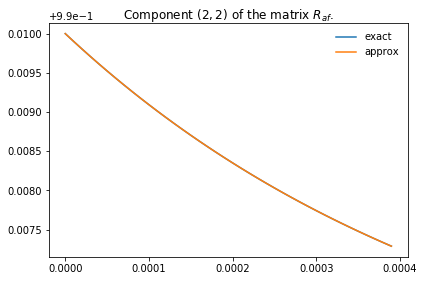

In [4]:
tau, i, j, n = 1e-4, 2, 2, 4

transitions = qmatrix.transpose()
exact = ExactSurvivor(transitions, tau)
approx = ApproxSurvivor(transitions, tau)

x = np.arange(0, n * tau, tau / 10.)
fig, ax = plt.subplots(1,1)
ax.plot(x, exact.af(x)[:, i, j], label="exact")
ax.plot(x, approx.af(x)[:, i, j], label="approx")
ax.set_title("Component ${0}$ of the matrix $R_{{af}}$.".format((i, j)))
ax.legend()
fig.tight_layout()

[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]


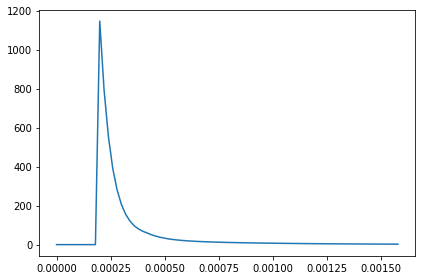

In [5]:
from dcprogs.likelihood import MissedEventsG, missed_events_pdf

tau = 2e-4
x, i, j = np.arange(0, 8*tau, tau/10.0), 2, 0
missedG = MissedEventsG(qmatrix, tau)
pdf = missed_events_pdf(qmatrix, tau, shut=True)
print(missedG.fa(0))
#plot(x, [missedG.fa(u)[i, j] for u in x])
fig, ax = plt.subplots(1,1)
ax.plot(x, pdf(x))
# plot(x, missed_events_pdf(qmatrix, tau, shut=True)(x))
fig.tight_layout()

In [6]:
def create_derivative(qmatrix, tau):
    from dcprogs.likelihood import inv, expm
    
    If = np.identity(qmatrix.nshut)
    Ia = np.identity(qmatrix.nopen)
 
    def Xff(s): return s*If - qmatrix.ff
    def Sff(s): return If - expm(-tau*Xff(s))
    def Gaf(s): return np.dot(inv(Xff(s)), qmatrix.fa)
  
    def derivative(s):
        result = np.dot(Sff(s), inv(Xff(s))) - tau * (If - Sff(s))
        return Ia + np.dot(np.dot(qmatrix.af, result), Gaf(s)) 
    return derivative

derivative = create_derivative(qmatrix, tau)
print(derivative(-1000))
print()
determinant = DeterminantEq(qmatrix, tau)
print(determinant.s_derivative(-1000))
print(-(determinant.H(-1000+1e-4) -  determinant.H(-1000-1e-4)) / (2e-4) + np.identity(qmatrix.nopen) - determinant.s_derivative(-1000))

[[  1.00078277e+00   1.95134590e-03]
 [  2.60179453e-05   1.02029429e+00]]

[[  1.00078277e+00   1.95134590e-03]
 [  2.60179453e-05   1.02029429e+00]]
[[ -1.47868762e-09  -3.64861093e-12]
 [ -2.78092880e-13   3.23290061e-10]]
